<a href="https://colab.research.google.com/github/adimyth/fast-ai/blob/master/Lesson_1(tuts).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cloning FastAI Course v3 Repo

In [1]:
!git clone https://github.com/fastai/course-v3.git

Cloning into 'course-v3'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 4037 (delta 11), reused 0 (delta 0), pack-reused 4002
Receiving objects: 100% (4037/4037), 203.36 MiB | 29.45 MiB/s, done.
Resolving deltas: 100% (2254/2254), done.


In [2]:
%cd course-v3/nbs

/content/course-v3/nbs


## Lesson 1

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [4]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



## CIFAR10 Dataset

In [5]:
path = untar_data(URLs.CIFAR)
path

PosixPath('/root/.fastai/data/cifar10')

In [6]:
# no validation data
path.ls()

[PosixPath('/root/.fastai/data/cifar10/train'),
 PosixPath('/root/.fastai/data/cifar10/labels.txt'),
 PosixPath('/root/.fastai/data/cifar10/test')]

In [7]:
(path / 'train').ls()

[PosixPath('/root/.fastai/data/cifar10/train/bird'),
 PosixPath('/root/.fastai/data/cifar10/train/deer'),
 PosixPath('/root/.fastai/data/cifar10/train/dog'),
 PosixPath('/root/.fastai/data/cifar10/train/automobile'),
 PosixPath('/root/.fastai/data/cifar10/train/frog'),
 PosixPath('/root/.fastai/data/cifar10/train/horse'),
 PosixPath('/root/.fastai/data/cifar10/train/cat'),
 PosixPath('/root/.fastai/data/cifar10/train/ship'),
 PosixPath('/root/.fastai/data/cifar10/train/airplane'),
 PosixPath('/root/.fastai/data/cifar10/train/truck')]

In [8]:
data = ImageDataBunch.from_folder(path, train='train', test='test', valid_pct=0.1, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (54000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bird,bird,bird,bird,bird
Path: /root/.fastai/data/cifar10;

Valid: LabelList (6000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
deer,airplane,automobile,airplane,truck
Path: /root/.fastai/data/cifar10;

Test: LabelList (10000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /root/.fastai/data/cifar10

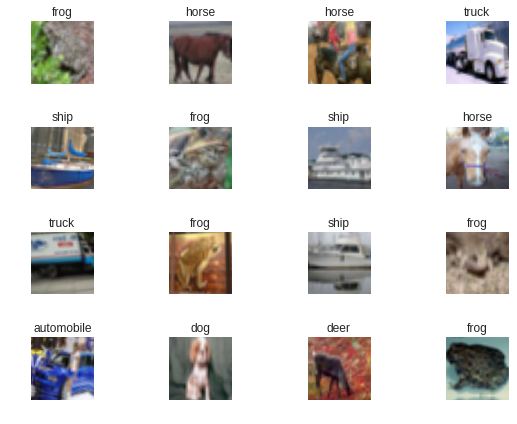

In [9]:
data.show_batch(rows=4, figsize=(8, 6))

In [10]:
data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

### Resnet50

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy])

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.425313,0.253123,0.912167,14:56
1,0.238872,0.156840,0.945500,14:44
2,0.196868,0.132408,0.952333,14:46
3,0.176133,0.124920,0.954500,14:44


In [0]:
learn.save('resnet50_cifar')

##  Interpretation

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

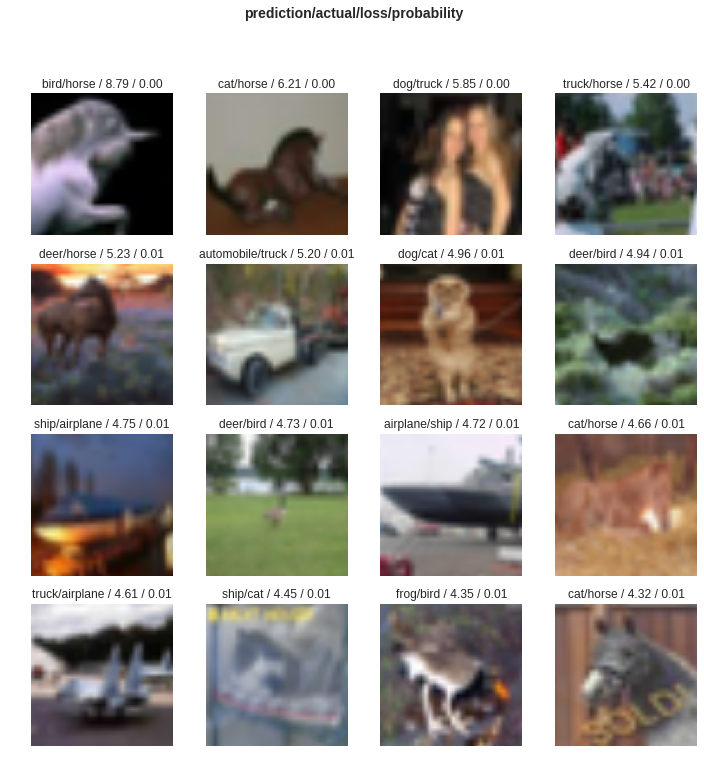

In [21]:
interp.plot_top_losses(16, heatmap=False)

In [20]:
doc(interp.plot_top_losses)

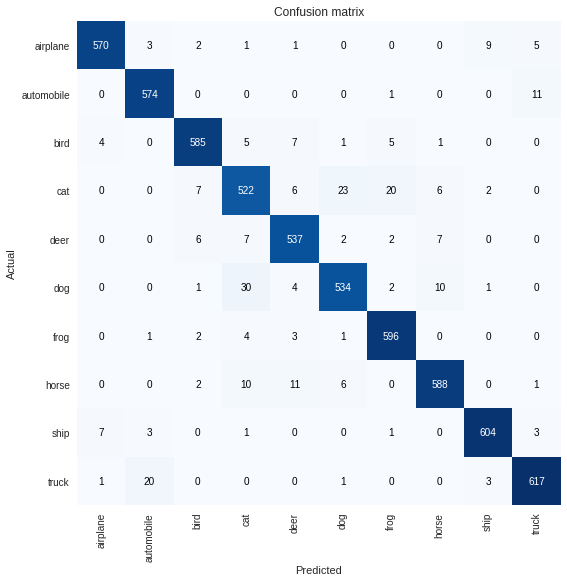

In [24]:
interp.plot_confusion_matrix(figsize=(12, 8))

In [26]:
interp.most_confused(min_val=5)

[('dog', 'cat', 30),
 ('cat', 'dog', 23),
 ('cat', 'frog', 20),
 ('truck', 'automobile', 20),
 ('automobile', 'truck', 11),
 ('horse', 'deer', 11),
 ('dog', 'horse', 10),
 ('horse', 'cat', 10),
 ('airplane', 'ship', 9),
 ('bird', 'deer', 7),
 ('cat', 'bird', 7),
 ('deer', 'cat', 7),
 ('deer', 'horse', 7),
 ('ship', 'airplane', 7),
 ('cat', 'deer', 6),
 ('cat', 'horse', 6),
 ('deer', 'bird', 6),
 ('horse', 'dog', 6),
 ('airplane', 'truck', 5),
 ('bird', 'cat', 5),
 ('bird', 'frog', 5)]

## Fine-Tuning

In [27]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


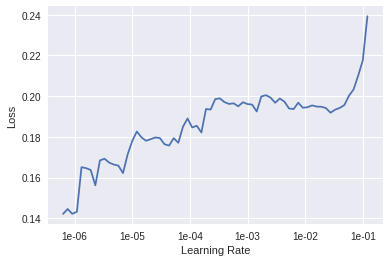

In [28]:
learn.recorder.plot()

In [29]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-8, 1e-6))

epoch,train_loss,valid_loss,accuracy,time
0,0.172615,0.123012,0.954167,19:37
1,0.160694,0.122704,0.955333,19:30
2,0.159769,0.122839,0.953500,19:27
3,0.165486,0.122405,0.954667,19:25


## Results on Test Data

In [31]:
predictions, targets = learn.TTA()

In [0]:
predicted_labels = np.argmax(predictions, axis=1)

In [44]:
targets

tensor([4, 0, 1,  ..., 6, 5, 0])

In [45]:
predictions.shape

torch.Size([6000, 10])

In [46]:
targets.shape

torch.Size([6000])

In [47]:
predicted_labels.shape

torch.Size([6000])

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(targets, predicted_labels)

0.9578333333333333